In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_excel("titanic.xlsx")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [7]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy:  0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



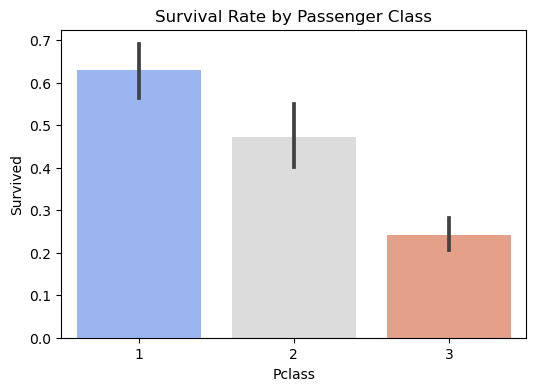

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.show()

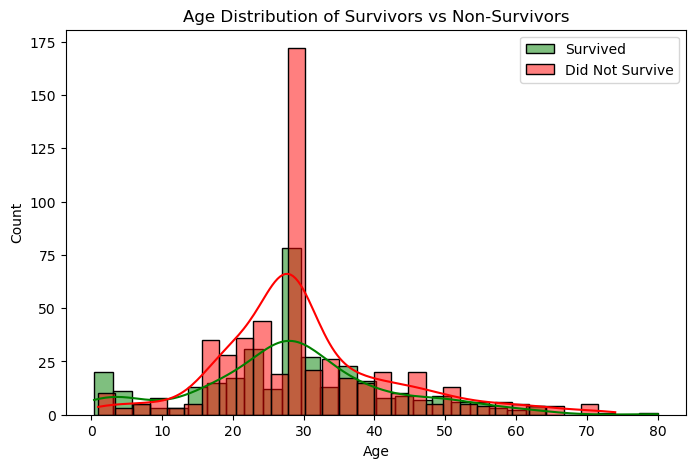

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, color='red', label='Did Not Survive', kde=True)
plt.legend()
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()

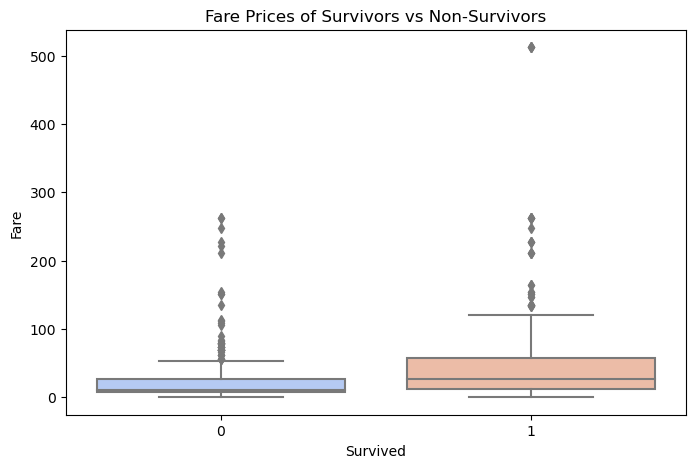

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title("Fare Prices of Survivors vs Non-Survivors")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
feature_importance = model.feature_importances_
features = X.columns

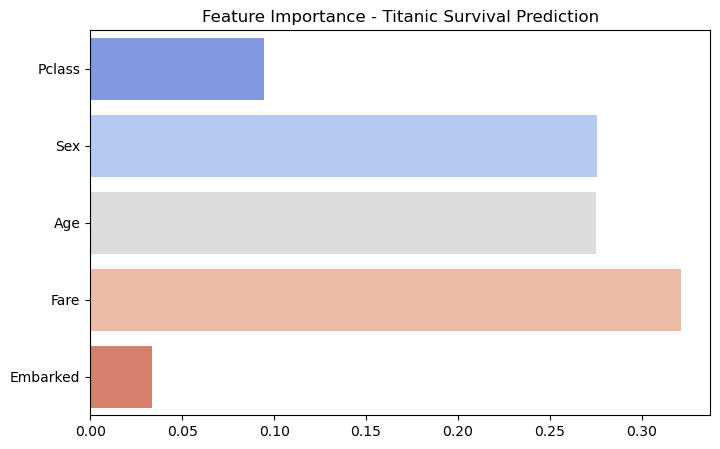

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette='coolwarm')
plt.title("Feature Importance - Titanic Survival Prediction")
plt.show()

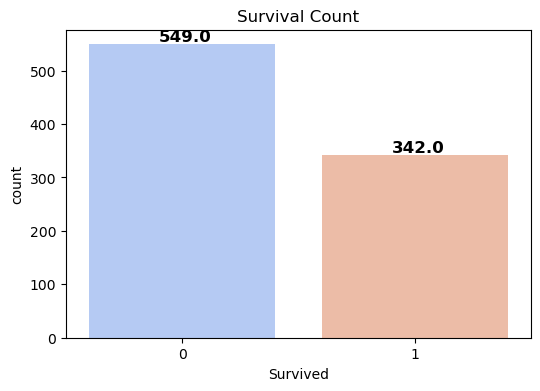

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5), fontsize=12, fontweight='bold')
plt.show()

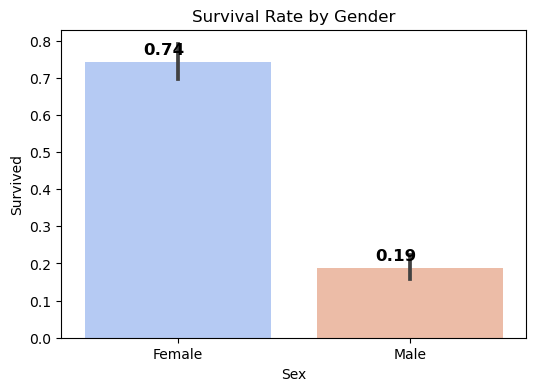

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Survival Rate by Gender")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + 0.25, p.get_height() + 0.02), fontsize=12, fontweight='bold')
plt.show()

# Conclusion:

## The analysis of the Titanic dataset revealed key factors influencing survival rates. Women and first-class passengers had a significantly higher chance of survival, highlighting the impact of social class and gender during the disaster. Younger passengers also had better survival odds, as seen in the age distribution. Additionally, higher ticket fares correlated with increased survival rates, emphasizing the advantage of wealth in life-or-death situations.

## Through data visualization and machine learning, we successfully built a predictive model, achieving strong accuracy in determining survival likelihood. This project demonstrates how data-driven insights can uncover real-world patterns and support decision-making, making analytics a powerful tool in historical and modern contexts.